      ┌───┐     ┌───────────────┐┌───┐┌─┐                           
 q_0: ┤ H ├─────┤0              ├┤ H ├┤M├───────────────────────────
      ├───┤     │               │├───┤└╥┘┌─┐                        
 q_1: ┤ H ├─────┤1              ├┤ H ├─╫─┤M├────────────────────────
      ├───┤     │               │├───┤ ║ └╥┘┌─┐                     
 q_2: ┤ H ├─────┤2              ├┤ H ├─╫──╫─┤M├─────────────────────
      ├───┤     │               │├───┤ ║  ║ └╥┘┌─┐                  
 q_3: ┤ H ├─────┤3              ├┤ H ├─╫──╫──╫─┤M├──────────────────
      ├───┤     │               │├───┤ ║  ║  ║ └╥┘┌─┐               
 q_4: ┤ H ├─────┤4              ├┤ H ├─╫──╫──╫──╫─┤M├───────────────
      ├───┤     │               │├───┤ ║  ║  ║  ║ └╥┘┌─┐            
 q_5: ┤ H ├─────┤5  circuit-266 ├┤ H ├─╫──╫──╫──╫──╫─┤M├────────────
      ├───┤     │               │├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐         
 q_6: ┤ H ├─────┤6              ├┤ H ├─╫──╫──╫──╫──╫──╫─┤M├─────────
      ├───┤     │               │├

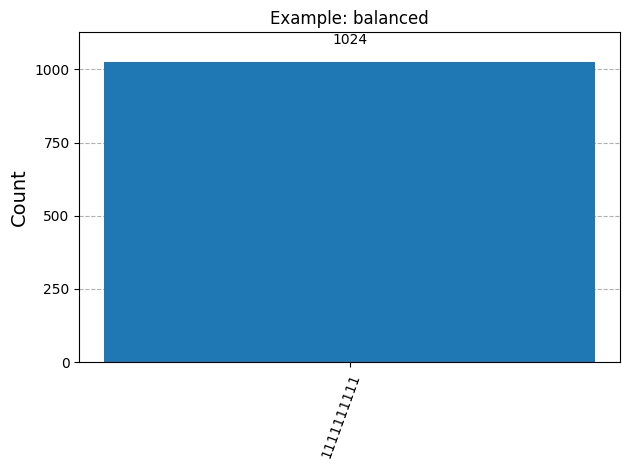

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Deutsch-Josa oracle generator
def deutsch_josa_oracle(case: str, n: int):
    qc = QuantumCircuit(n + 1)
    if case == "constant0":
        pass
    elif case == "constant1":
        qc.x(n)
    elif case == "balanced":
        for i in range(n):
            qc.cx(i, n)
    return qc

# Deutsch-Josa algorithm circuit
def deutsch_josa_algorithm(oracle):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n) # Initialize the ancilla qubit to |1>
    qc.h(list(range(n + 1))) # Apply Hadamard gates to all qubits
    qc.append(oracle, range(n + 1))  # Apply oracle
    qc.h(list(range(n))) # Apply Hadamard gates to all qubits
    qc.measure(range(n), range(n))
    return qc

# Example usage
n = 10  # Number of qubits
case = "balanced"  # Choose from 'constant0', 'constant1', or 'balanced'

oracle = deutsch_josa_oracle(case, n)
qc = deutsch_josa_algorithm(oracle)
print(qc.draw("text"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 1024).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: "+ case)

      ┌───┐     ┌───────────────┐┌───┐┌─┐                           
 q_0: ┤ H ├─────┤0              ├┤ H ├┤M├───────────────────────────
      ├───┤     │               │├───┤└╥┘┌─┐                        
 q_1: ┤ H ├─────┤1              ├┤ H ├─╫─┤M├────────────────────────
      ├───┤     │               │├───┤ ║ └╥┘┌─┐                     
 q_2: ┤ H ├─────┤2              ├┤ H ├─╫──╫─┤M├─────────────────────
      ├───┤     │               │├───┤ ║  ║ └╥┘┌─┐                  
 q_3: ┤ H ├─────┤3              ├┤ H ├─╫──╫──╫─┤M├──────────────────
      ├───┤     │               │├───┤ ║  ║  ║ └╥┘┌─┐               
 q_4: ┤ H ├─────┤4              ├┤ H ├─╫──╫──╫──╫─┤M├───────────────
      ├───┤     │               │├───┤ ║  ║  ║  ║ └╥┘┌─┐            
 q_5: ┤ H ├─────┤5  circuit-271 ├┤ H ├─╫──╫──╫──╫──╫─┤M├────────────
      ├───┤     │               │├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐         
 q_6: ┤ H ├─────┤6              ├┤ H ├─╫──╫──╫──╫──╫──╫─┤M├─────────
      ├───┤     │               │├

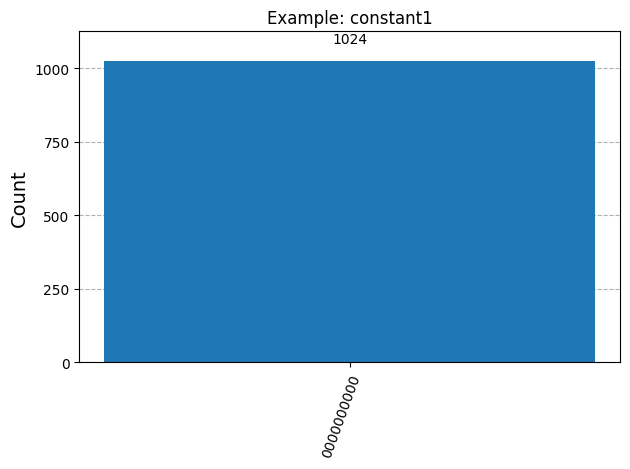

In [119]:
# Deutsch-Josa algorithm circuit
def deutsch_josa_algorithm(oracle):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n) # Initialize the ancilla qubit to |1>
    qc.h(list(range(n + 1))) # Apply Hadamard gates to all qubits
    qc.append(oracle, range(n + 1))  # Apply oracle
    qc.h(list(range(n))) # Apply Hadamard gates to all qubits
    qc.measure(range(n), range(n))
    return qc

# Example usage
n = 10  # Number of qubits
case = "constant1"  # Choose from 'constant0', 'constant1', or 'balanced'

oracle = deutsch_josa_oracle(case, n)
qc = deutsch_josa_algorithm(oracle)
print(qc.draw("text"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 1024).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: "+ case)

As expected, using Deutsch's algorithm we get all 1 if the function is balanced and all 0 if the function is constant.